___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://d33wubrfki0l68.cloudfront.net/4ec62c1c925a380c912ddad740d18554c6822a11/fabe4/img/sponsors/iteso-university.png" width="600" height="500" />
    
    
### <font color='navy'> Modelado de pronóstico de series de tiempo.

**Nombres:** Francisco Javier Gonzalez Lazalde.

**Fecha:** 15 de mayo de 2025.

**Expediente** : 744576.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Pacolaz/Proyecto_MPST.git

# Proyecto Final

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Proyecto_en_construccion.jpg" width="300px" height="100px" />


# 📘 Proyecto Final — Modelado No Lineal de Series de Tiempo

## 🎯 Objetivo general

Desarrollar un proyecto aplicado de modelado de series de tiempo que integre los tres temas principales del curso: construcción de modelos de pronóstico, aplicación de modelos neuronales, y clasificación de series de tiempo. El proyecto debe demostrar habilidades prácticas en la selección, implementación y evaluación de modelos tanto lineales como no lineales, así como una interpretación adecuada de los resultados obtenidos.

---

## 🧩 Requisitos del proyecto

El proyecto debe cumplir con las siguientes especificaciones:

### 1. Análisis y pronóstico de series de tiempo

- Seleccionar una base de datos con al menos una serie de tiempo univariada (se sugiere además considerar variables adicionales para generar un enfoque multivariado que se usará posteriormente).
- Aplicar un modelo de pronóstico **lineal clásico** (por ejemplo, SARIMAX) **solo para el caso univariado**. Recuerda usar y argumentar todo el análisis que debe ser realizado para este tipo de modelos.
- Evaluar el desempeño del modelo lineal como línea base (Usar métricas como MAPE, MSE y $R^2$).

### 2. Modelos neuronales para series de tiempo

- Desarrollar e implementar los siguientes modelos para el pronóstico de la serie:
  - **Multilayer Perceptron (MLP)**
  - **Convolutional Neural Network (CNN)**
  - **Long Short-Term Memory (LSTM)**
  - **Conv-LSTM**

- Implementar cada uno de los modelos anteriores **tanto para el caso univariado como multivariado**.
- Comparar el desempeño de los modelos neuronales **univariados vs. multivariados**.
- Comparar el desempeño de los modelos neuronales **univariados** con el modelo **lineal clásico**. Crear gráficas donde se evidencie la predicción en el conjunto de test tanto del modelo lineal como no lineal

> Seleccionar al menos 3 estructuras de cada modelo. De todo el conjunto de modelos entrenados, seleccionar el modelo que obtuvo mejor rendimiento. A dicho modelo hacer una optimización parámetrica usando optuna. Recuerde que si usa callbacks como `EarlyStopping`, debe configurarse apropiadamente para permitir que el modelo se entrene una cantidad de épocas apropiadas.

### 3. Clasificación de series de tiempo

- Elegir **una de las siguientes opciones**:
  - Transformar el problema de regresión abordado previamente en un problema de clasificación (por ejemplo, clasificar tendencias como "sube", "baja" o "estable").
  - Seleccionar **una nueva base de datos** específicamente orientada a clasificación de series de tiempo.

- Implementar las siguientes estructuras de modelos que permitan resolver el problema de clasificación:
  - MLP para clasificación
  - CNN para clasificación
  - LSTM para clasificación
  - CNN-LSTM para clasificación
  - Algoritmos clásicos de Machine Learning (SVM, Random Forest, etc.)

---

## 📊 Evaluación

La calificación del proyecto final se dividirá en dos partes:

- **60% Trabajo escrito y código entregado**: Se evaluará la calidad del desarrollo, implementación y análisis del proyecto conforme a los criterios siguientes:
  | Criterio                                           | Ponderación |
  |----------------------------------------------------|-------------|
  | Aplicación correcta del modelo lineal              | 10%         |
  | Implementación y análisis de modelos neuronales    | 40%         |
  | Desarrollo del modelo de clasificación             | 25%         |
  | Comparación y análisis crítico de los resultados   | 15%         |
  | Calidad del código y documentación                 | 10%         |

- **40% Presentación del proyecto**:  
  Cada equipo deberá preparar una presentación del proyecto utilizando un **notebook de Python** que combine explicación técnica con visualizaciones. La presentación se realizará durante un horario de clase que será definido posteriormente. Se evaluará la claridad, profundidad técnica, visualización de resultados y capacidad de respuesta a preguntas del público.


---

## 💡 Requisitos

- Utilizar `git` y `GitHub` para documentar el proceso de desarrollo del proyecto. Se debe de adjuntar al inicio del notebook con la presentación, el link de github donde se evidencie el proyecto realizado y los commits y PR datos por cada equipo. La falta de trabajo conjunto usando `git` restará puntos a la presentación final.
- Aplica buenas prácticas de limpieza, transformación y partición de los datos.
- Asegúrate de justificar adecuadamente tus decisiones de modelado y arquitectura.
- Elabora una presentación clara de los resultados con visualizaciones efectivas.

## ⭐ Bonus

Los equipos que utilicen **Metaflow** como herramienta de orquestación y trazabilidad del pipeline de modelado recibirán **puntos extras** en la calificación final del proyecto.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#from pmdarima import auto_arima
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten, LSTM, Bidirectional, ConvLSTM2D, MaxPooling3D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Preprocesamiento

In [ ]:
df = pd.read_csv('weatherHistory.csv')

In [ ]:
df = df.sort_values('Formatted Date').reset_index(drop=True)

In [ ]:
df['Date'] = pd.to_datetime(df['Formatted Date'])
df.set_index('Date', inplace=True)

<ipython-input-4-a873f5ac4fec>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Formatted Date'])


In [ ]:
df = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]
df.dropna(inplace=True)

<ipython-input-5-69daf8a4a498>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
df.index = pd.to_datetime(df.index, utc=True)
df.index = df.index.tz_convert(None)

In [ ]:
df.head()

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Date,,,,
2005-12-31 23:00:00,0.577778,0.89,17.1143,1016.66
2006-01-01 00:00:00,1.161111,0.85,16.6152,1016.15
2006-01-01 01:00:00,1.666667,0.82,20.2538,1015.87
2006-01-01 02:00:00,1.711111,0.82,14.4900,1015.56
2006-01-01 03:00:00,1.183333,0.86,13.9426,1014.98


# Análisis Exploratorio

In [ ]:
df.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640,1003.235956
std,9.551546,0.195473,6.913571,116.969906
min,-21.822222,0.000000,0.000000,0.000000
25%,4.688889,0.600000,5.828200,1011.900000
50%,12.000000,0.780000,9.965900,1016.450000
75%,18.838889,0.890000,14.135800,1021.090000
max,39.905556,1.000000,63.852600,1046.380000


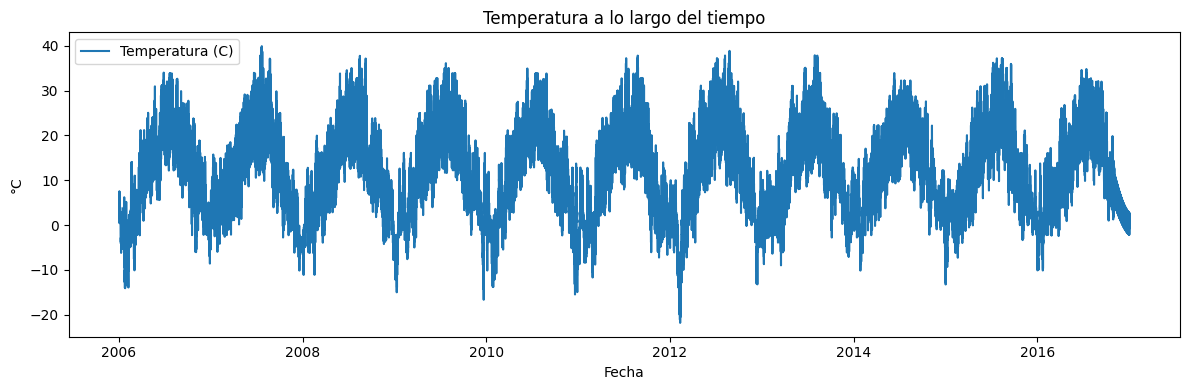

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df['Temperature (C)'], label='Temperatura (C)')
plt.title('Temperatura a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('°C')
plt.legend()
plt.tight_layout()
plt.show()

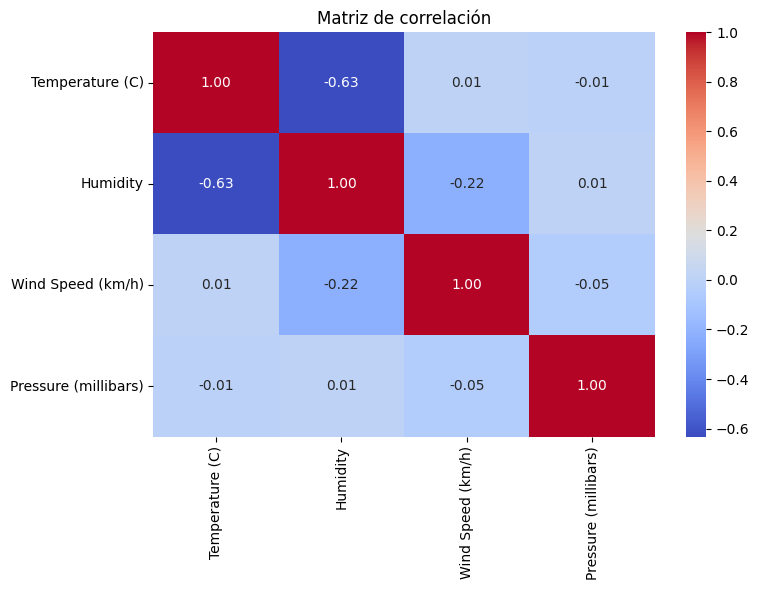

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()

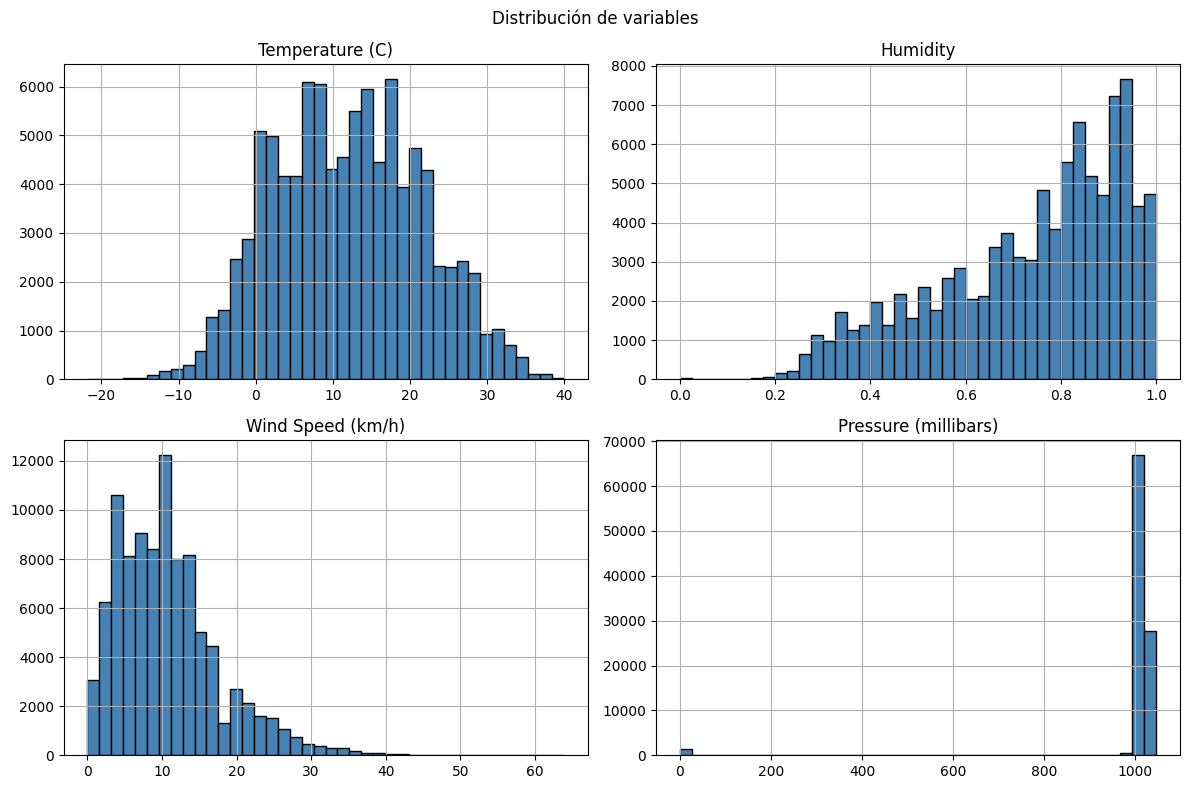

In [ ]:
df.hist(bins=40, figsize=(12, 8), color='steelblue', edgecolor='black')
plt.suptitle('Distribución de variables')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

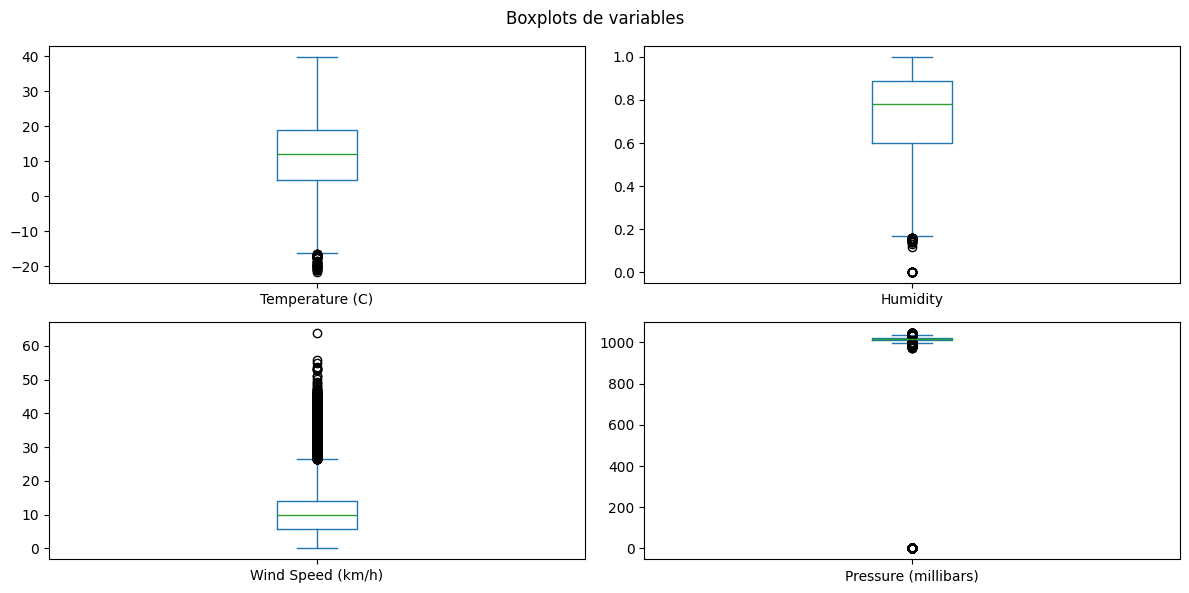

In [ ]:
plt.figure(figsize=(12, 6))
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12, 6))
plt.suptitle('Boxplots de variables')
plt.tight_layout()
plt.show()

In [ ]:
df = df[df['Pressure (millibars)'] > 300]

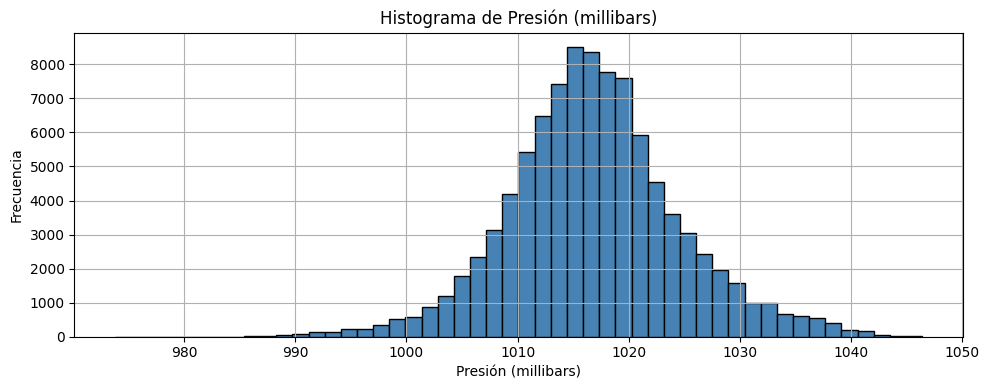

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(df['Pressure (millibars)'], bins=50, color='steelblue', edgecolor='black')
plt.title('Histograma de Presión (millibars)')
plt.xlabel('Presión (millibars)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

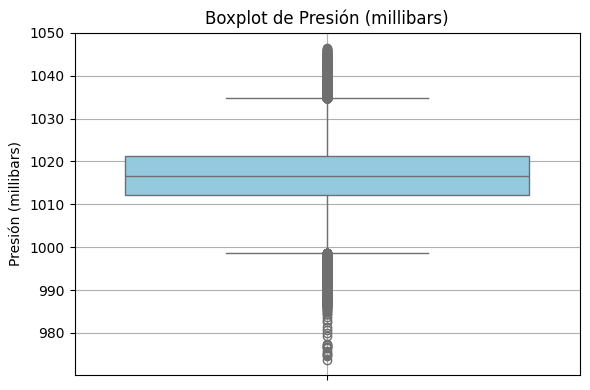

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Pressure (millibars)'], color='skyblue')
plt.title('Boxplot de Presión (millibars)')
plt.ylabel('Presión (millibars)')
plt.grid(True)
plt.tight_layout()
plt.show()

# SARIMAX

In [ ]:
ts = df['Temperature (C)']
ts = ts.sort_index()

In [ ]:
n = int(len(ts) * 0.8)
train, test = ts[:n], ts[n:]

In [ ]:
train_sample = train['2013-01-01':'2014-10-15']

In [ ]:
model_auto = auto_arima(train,
                        seasonal=True,
                        m=24,
                        trace=True,
                        suppress_warnings=True,
                        error_action='ignore',
                        stepwise=True,
                        max_order=15)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=347.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=273851.061, Time=1.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
print("Best order:", model_auto.order)
print("Best seasonal order:", model_auto.seasonal_order)

In [ ]:
model = SARIMAX(train_sample, order=(2,1,2), seasonal_order=(1,0,1,24), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
pred = results.get_prediction(start=len(train), end=len(train)+len(test)-1)
pred = pred.predicted_mean
pred.index = test.index

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
mse = mean_squared_error(test, pred)
mae = mean_absolute_error(test, pred)
r2 = r2_score(test, pred)

print(f"Evaluación:")
print(f"• MSE:  {mse:.3f}")
print(f"• MAE:  {mae:.3f}")
print(f"• R²:   {r2:.3f}")

Evaluación:
• MSE:  446.015
• MAE:  19.111
• R²:   -4.491


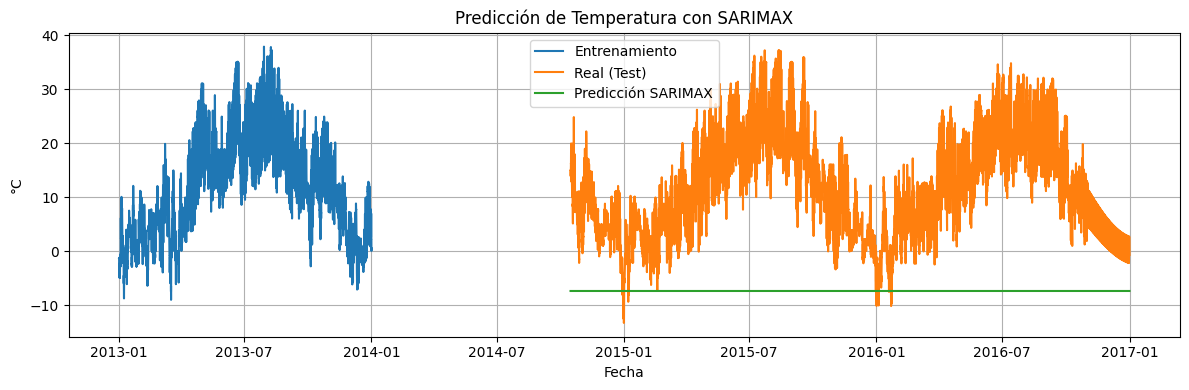

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(train_sample.index, train_sample, label='Entrenamiento')
plt.plot(test.index, test, label='Real (Test)')
plt.plot(pred.index, pred, label='Predicción SARIMAX')
plt.title('Predicción de Temperatura con SARIMAX')
plt.xlabel('Fecha')
plt.ylabel('°C')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Modelos Neuronales

## MLP

### Univariado

In [ ]:
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(ts.values.reshape(-1, 1))

In [ ]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i - n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [ ]:
n_steps = 24
X, y = create_sequences(ts_scaled, n_steps)

In [ ]:
n = int(len(X) * 0.8)
X_train, X_test = X[:n], X[n:]
y_train, y_test = y[:n], y[n:]

#### Arquitectura 1

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_steps,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0054 - val_loss: 4.8347e-04
Epoch 2/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.9233e-04 - val_loss: 3.1640e-04
Epoch 3/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.4640e-04 - val_loss: 2.6949e-04
Epoch 4/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.3348e-04 - val_loss: 2.6090e-04
Epoch 5/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 4.2590e-04 - val_loss: 2.6271e-04
Epoch 6/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.2255e-04 - val_loss: 2.3781e-04
Epoch 7/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 4.0235e-04 - val_loss: 2.3929e-04
Epoch 8/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3.9578e-04 - val_loss: 3.2195e-04
Epoch 9/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.9478e-04 - val_loss: 2.4356e-04
Epoch 10/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 3.9636e-04 - val_loss: 2.9286e-04
Epoch 11/100
1903/1903 ━━━━━━━━

In [ ]:
y_pred = model.predict(X_test)

y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inv = scaler.inverse_transform(y_pred).flatten()

595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

#### Arquitectura 2

In [ ]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=(n_steps,)))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history2 = model2.fit(X_train, y_train,
                      validation_split=0.2,
                      epochs=100,
                      batch_size=32,
                      callbacks=[early_stop],
                      verbose=1)

Epoch 1/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0058 - val_loss: 0.0070
Epoch 2/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.8803e-04 - val_loss: 0.0077
Epoch 3/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.2624e-04 - val_loss: 0.0099
Epoch 4/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 5.8451e-04 - val_loss: 0.0096
Epoch 5/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.2826e-04 - val_loss: 0.0105
Epoch 6/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.5925e-04 - val_loss: 0.0108
Epoch 7/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 5.1940e-04 - val_loss: 0.0100
Epoch 8/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.0114e-04 - val_loss: 0.0108
Epoch 9/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 4.7092e-04 - val_loss: 0.0101
Epoch 10/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 4.8217e-04 - val_loss: 0.0104
Epoch 11/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 4.71

In [ ]:
y_pred2 = model2.predict(X_test)
y_pred2_inv = scaler.inverse_transform(y_pred2).flatten()

595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
mse2 = mean_squared_error(y_test_inv, y_pred2_inv)
mae2 = mean_absolute_error(y_test_inv, y_pred2_inv)
r2_2 = r2_score(y_test_inv, y_pred2_inv)

#### Arquitectura 3

In [ ]:
model3 = Sequential()
model3.add(Dense(32, activation='tanh', input_shape=(n_steps,)))
model3.add(Dense(16, activation='tanh'))
model3.add(Dense(1))

model3.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history3 = model3.fit(X_train, y_train,
                      validation_split=0.2,
                      epochs=100,
                      batch_size=32,
                      callbacks=[early_stop],
                      verbose=1)

Epoch 1/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0069 - val_loss: 4.2129e-04
Epoch 2/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.3953e-04 - val_loss: 3.0319e-04
Epoch 3/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.8555e-04 - val_loss: 2.9906e-04
Epoch 4/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 4.7009e-04 - val_loss: 4.5095e-04
Epoch 5/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.5640e-04 - val_loss: 2.6865e-04
Epoch 6/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.6589e-04 - val_loss: 3.0871e-04
Epoch 7/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 4.5621e-04 - val_loss: 2.4519e-04
Epoch 8/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.4307e-04 - val_loss: 3.9585e-04
Epoch 9/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 4.3641e-04 - val_loss: 2.6363e-04
Epoch 10/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 4.3730e-04 - val_loss: 2.5586e-04
Epoch 11/100
1903/1903 ━━━━━━━

In [ ]:
y_pred3 = model3.predict(X_test)
y_pred3_inv = scaler.inverse_transform(y_pred3).flatten()

595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
mse3 = mean_squared_error(y_test_inv, y_pred3_inv)
mae3 = mean_absolute_error(y_test_inv, y_pred3_inv)
r2_3 = r2_score(y_test_inv, y_pred3_inv)

#### Evaluación

In [ ]:
print(f"Modelo 1 - MSE: {mse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")
print(f"Modelo 2 - MSE: {mse2:.3f}, MAE: {mae2:.3f}, R²: {r2_2:.3f}")
print(f"Modelo 3 - MSE: {mse3:.3f}, MAE: {mae3:.3f}, R²: {r2_3:.3f}")

Modelo 1 - MSE: 0.765, MAE: 0.620, R²: 0.991
Modelo 2 - MSE: 24.458, MAE: 4.658, R²: 0.699
Modelo 3 - MSE: 0.846, MAE: 0.660, R²: 0.990


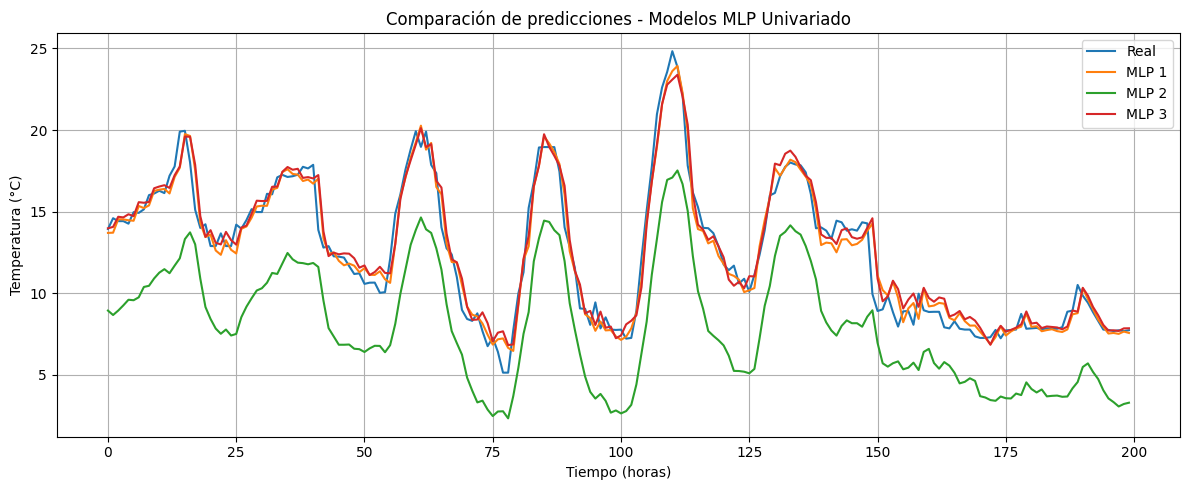

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv[:200], label='Real')
plt.plot(y_pred_inv[:200], label='MLP 1')
plt.plot(y_pred2_inv[:200], label='MLP 2')
plt.plot(y_pred3_inv[:200], label='MLP 3')
plt.title("Comparación de predicciones - Modelos MLP Univariado")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Multivariado

## CNN

### Univariado

In [ ]:
X_cnn = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test = X_cnn[:n], X_cnn[n:]
y_train, y_test = y[:n], y[n:]

y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#### Arquitectura 1

In [ ]:
model_cnn1 = Sequential()
model_cnn1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_steps, 1)))
model_cnn1.add(Flatten())
model_cnn1.add(Dense(1))

model_cnn1.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_cnn1 = model_cnn1.fit(X_train, y_train,
                              validation_split=0.2,
                              epochs=100,
                              batch_size=32,
                              callbacks=[early_stop],
                              verbose=1)

Epoch 1/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0082 - val_loss: 4.2734e-04
Epoch 2/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 4.9763e-04 - val_loss: 4.0274e-04
Epoch 3/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.3844e-04 - val_loss: 2.4506e-04
Epoch 4/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.4181e-04 - val_loss: 2.5508e-04
Epoch 5/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.2286e-04 - val_loss: 3.7172e-04
Epoch 6/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 4.1523e-04 - val_loss: 2.4659e-04
Epoch 7/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 4.2310e-04 - val_loss: 3.4580e-04
Epoch 8/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.0322e-04 - val_loss: 2.5960e-04
Epoch 9/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 4.2112e-04 - val_loss: 2.5372e-04
Epoch 10/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.0830e-04 - val_loss: 2.3670e-04
Epoch 11/100
1903/1903 ━━━━━━━━━

In [ ]:
y_pred1 = model_cnn1.predict(X_test)
y_pred1_inv = scaler.inverse_transform(y_pred1).flatten()

595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
mse1 = mean_squared_error(y_test_inv, y_pred1_inv)
mae1 = mean_absolute_error(y_test_inv, y_pred1_inv)
r2_1 = r2_score(y_test_inv, y_pred1_inv)

#### Arquitectura 2

In [ ]:
model_cnn2 = Sequential()
model_cnn2.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(n_steps, 1)))
model_cnn2.add(MaxPooling1D(pool_size=2))
model_cnn2.add(Flatten())
model_cnn2.add(Dense(1))

model_cnn2.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_cnn2 = model_cnn2.fit(X_train, y_train,
                              validation_split=0.2,
                              epochs=100,
                              batch_size=32,
                              callbacks=[early_stop],
                              verbose=1)

Epoch 1/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0041 - val_loss: 4.3445e-04
Epoch 2/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.8556e-04 - val_loss: 4.1189e-04
Epoch 3/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 5.1871e-04 - val_loss: 3.3639e-04
Epoch 4/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.7359e-04 - val_loss: 3.0710e-04
Epoch 5/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 4.5329e-04 - val_loss: 5.7461e-04
Epoch 6/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 4.6403e-04 - val_loss: 2.8942e-04
Epoch 7/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4.4483e-04 - val_loss: 2.8394e-04
Epoch 8/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.3418e-04 - val_loss: 2.9752e-04
Epoch 9/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.3684e-04 - val_loss: 3.0408e-04
Epoch 10/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 4.2398e-04 - val_loss: 2.7283e-04
Epoch 11/100
1903/1903 ━━━━━━━━━

In [ ]:
y_pred2 = model_cnn2.predict(X_test)
y_pred2_inv = scaler.inverse_transform(y_pred2).flatten()

595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
mse2 = mean_squared_error(y_test_inv, y_pred2_inv)
mae2 = mean_absolute_error(y_test_inv, y_pred2_inv)
r2_2 = r2_score(y_test_inv, y_pred2_inv)

#### Arquitectura 3

In [ ]:
model_cnn3 = Sequential()
model_cnn3.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_steps, 1)))
model_cnn3.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_cnn3.add(GlobalMaxPooling1D())
model_cnn3.add(Dense(1))

model_cnn3.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_cnn3 = model_cnn3.fit(X_train, y_train,
                              validation_split=0.2,
                              epochs=100,
                              batch_size=32,
                              callbacks=[early_stop],
                              verbose=1)

Epoch 1/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0136 - val_loss: 0.0046
Epoch 2/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 3/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 4/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 5/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 6/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 7/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 8/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 9/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 10/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 11/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 12/100
1903

In [ ]:
y_pred3 = model_cnn3.predict(X_test)
y_pred3_inv = scaler.inverse_transform(y_pred3).flatten()

595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
mse3 = mean_squared_error(y_test_inv, y_pred3_inv)
mae3 = mean_absolute_error(y_test_inv, y_pred3_inv)
r2_3 = r2_score(y_test_inv, y_pred3_inv)

#### Evaluación

In [ ]:
print(f"Modelo 1 - MSE: {mse1:.3f}, MAE: {mae1:.3f}, R²: {r2_1:.3f}")
print(f"Modelo 2 - MSE: {mse2:.3f}, MAE: {mae2:.3f}, R²: {r2_2:.3f}")
print(f"Modelo 3 - MSE: {mse3:.3f}, MAE: {mae3:.3f}, R²: {r2_3:.3f}")

Modelo 1 - MSE: 0.795, MAE: 0.640, R²: 0.990
Modelo 2 - MSE: 0.843, MAE: 0.655, R²: 0.990
Modelo 3 - MSE: 7.816, MAE: 2.117, R²: 0.904


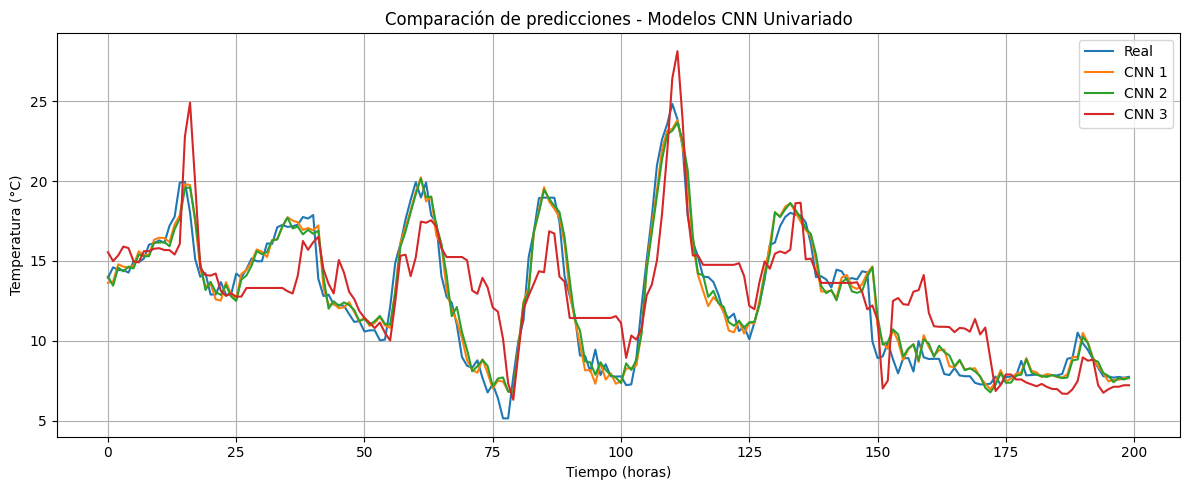

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv[:200], label='Real')
plt.plot(y_pred1_inv[:200], label='CNN 1')
plt.plot(y_pred2_inv[:200], label='CNN 2')
plt.plot(y_pred3_inv[:200], label='CNN 3')
plt.title("Comparación de predicciones - Modelos CNN Univariado")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## LSTM

### Univariado

In [ ]:
X_lstm = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test = X_lstm[:n], X_lstm[n:]
y_train, y_test = y[:n], y[n:]

y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

#### Arquitectura 1

In [ ]:
model_lstm1 = Sequential()
model_lstm1.add(LSTM(64, activation='tanh', input_shape=(n_steps, 1)))
model_lstm1.add(Dense(1))

model_lstm1.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history_lstm1 = model_lstm1.fit(X_train, y_train,
                                validation_split=0.2,
                                epochs=100,
                                batch_size=32,
                                callbacks=[early_stop],
                                verbose=1)

Epoch 1/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0080 - val_loss: 4.5174e-04
Epoch 2/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 6.0401e-04 - val_loss: 3.1824e-04
Epoch 3/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 4.4844e-04 - val_loss: 2.6416e-04
Epoch 4/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 4.5119e-04 - val_loss: 2.8414e-04
Epoch 5/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 4.2372e-04 - val_loss: 2.6348e-04
Epoch 6/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 4.1049e-04 - val_loss: 3.1486e-04
Epoch 7/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 3.8985e-04 - val_loss: 2.5918e-04
Epoch 8/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 3.8656e-04 - val_loss: 2.5732e-04
Epoch 9/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 3.7214e-04 - val_loss: 2.9042e-04
Epoch 10/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 3.7188e-04 - val_loss: 2.5650e-04
Epoch 11/100
1903/1903 

In [ ]:
y_pred1 = model_lstm1.predict(X_test)
y_pred1_inv = scaler.inverse_transform(y_pred1).flatten()

595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
mse1 = mean_squared_error(y_test_inv, y_pred1_inv)
mae1 = mean_absolute_error(y_test_inv, y_pred1_inv)
r2_1 = r2_score(y_test_inv, y_pred1_inv)

#### Arquitectura 2

In [ ]:
model_lstm2 = Sequential()
model_lstm2.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(n_steps, 1)))
model_lstm2.add(LSTM(32, activation='tanh'))
model_lstm2.add(Dense(1))

model_lstm2.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history_lstm2 = model_lstm2.fit(X_train, y_train,
                                validation_split=0.2,
                                epochs=100,
                                batch_size=32,
                                callbacks=[early_stop],
                                verbose=1)

Epoch 1/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0090 - val_loss: 4.0718e-04
Epoch 2/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 5.4097e-04 - val_loss: 6.3353e-04
Epoch 3/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 4.7611e-04 - val_loss: 3.1216e-04
Epoch 4/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 4.4081e-04 - val_loss: 2.7276e-04
Epoch 5/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 4.3301e-04 - val_loss: 2.7956e-04
Epoch 6/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 4.1305e-04 - val_loss: 2.9355e-04
Epoch 7/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 4.0055e-04 - val_loss: 2.6557e-04
Epoch 8/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 3.8650e-04 - val_loss: 2.5128e-04
Epoch 9/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 3.7504e-04 - val_loss: 2.6173e-04
Epoch 10/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 3.6413e-04 - val_loss: 2.6270e-04
Epoch 11/100
1903/1903 

In [ ]:
y_pred2 = model_lstm2.predict(X_test)
y_pred2_inv = scaler.inverse_transform(y_pred2).flatten()

595/595 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
mse2 = mean_squared_error(y_test_inv, y_pred2_inv)
mae2 = mean_absolute_error(y_test_inv, y_pred2_inv)
r2_2 = r2_score(y_test_inv, y_pred2_inv)

#### Arquitectura 3

In [ ]:
model_lstm3 = Sequential()
model_lstm3.add(Bidirectional(LSTM(64, activation='tanh'), input_shape=(n_steps, 1)))
model_lstm3.add(Dense(1))

model_lstm3.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history_lstm3 = model_lstm3.fit(X_train, y_train,
                                validation_split=0.2,
                                epochs=100,
                                batch_size=32,
                                callbacks=[early_stop],
                                verbose=1)

Epoch 1/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0058 - val_loss: 7.1675e-04
Epoch 2/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 5.4780e-04 - val_loss: 2.7997e-04
Epoch 3/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 4.3895e-04 - val_loss: 2.6309e-04
Epoch 4/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 4.1824e-04 - val_loss: 3.2028e-04
Epoch 5/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 4.0127e-04 - val_loss: 2.4329e-04
Epoch 6/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 3.9765e-04 - val_loss: 2.4572e-04
Epoch 7/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 4.0122e-04 - val_loss: 2.4178e-04
Epoch 8/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 3.9197e-04 - val_loss: 2.4136e-04
Epoch 9/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 3.7962e-04 - val_loss: 2.3610e-04
Epoch 10/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - loss: 3.6188e-04 - val_loss: 2.4140e-04
Epoch 11/100
1903/1903 

In [ ]:
y_pred3 = model_lstm3.predict(X_test)
y_pred3_inv = scaler.inverse_transform(y_pred3).flatten()

595/595 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
mse3 = mean_squared_error(y_test_inv, y_pred3_inv)
mae3 = mean_absolute_error(y_test_inv, y_pred3_inv)
r2_3 = r2_score(y_test_inv, y_pred3_inv)

#### Evaluación

In [ ]:
print(f"Modelo 1 - MSE: {mse1:.3f}, MAE: {mae1:.3f}, R²: {r2_1:.3f}")
print(f"Modelo 2 - MSE: {mse2:.3f}, MAE: {mae2:.3f}, R²: {r2_2:.3f}")
print(f"Modelo 3 - MSE: {mse3:.3f}, MAE: {mae3:.3f}, R²: {r2_3:.3f}")

Modelo 1 - MSE: 0.767, MAE: 0.624, R²: 0.991
Modelo 2 - MSE: 0.788, MAE: 0.631, R²: 0.990
Modelo 3 - MSE: 0.760, MAE: 0.615, R²: 0.991


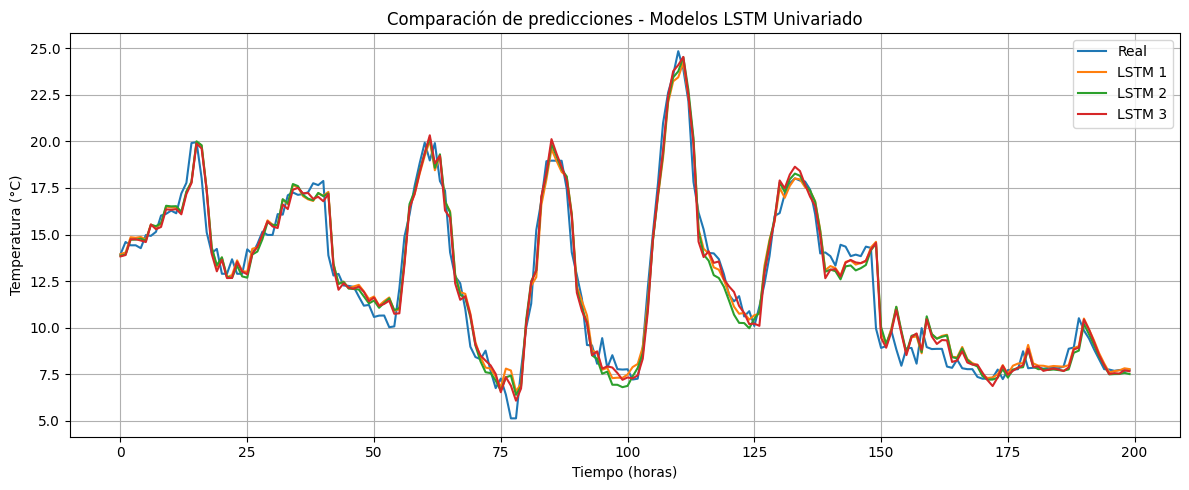

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv[:200], label='Real')
plt.plot(y_pred1_inv[:200], label='LSTM 1')
plt.plot(y_pred2_inv[:200], label='LSTM 2')
plt.plot(y_pred3_inv[:200], label='LSTM 3')
plt.title("Comparación de predicciones - Modelos LSTM Univariado")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Conv-LSTM

### Univariado

In [ ]:
X_convlstm = X.reshape((X.shape[0], 1, n_steps, 1, 1))

X_train, X_test = X_convlstm[:n], X_convlstm[n:]
y_train, y_test = y[:n], y[n:]

y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

#### Arquitectura 1

In [ ]:
model_clstm1 = Sequential()
model_clstm1.add(ConvLSTM2D(filters=32, kernel_size=(3, 1), activation='relu',
                            input_shape=(1, n_steps, 1, 1)))
model_clstm1.add(Flatten())
model_clstm1.add(Dense(1))

model_clstm1.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history_clstm1 = model_clstm1.fit(X_train, y_train,
                                  validation_split=0.2,
                                  epochs=100,
                                  batch_size=32,
                                  callbacks=[early_stop],
                                  verbose=1)

Epoch 1/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0183 - val_loss: 6.2173e-04
Epoch 2/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 6.7293e-04 - val_loss: 3.6046e-04
Epoch 3/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.9212e-04 - val_loss: 2.9082e-04
Epoch 4/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 4.4665e-04 - val_loss: 2.8833e-04
Epoch 5/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 4.3900e-04 - val_loss: 2.8910e-04
Epoch 6/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4.3114e-04 - val_loss: 3.3659e-04
Epoch 7/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 4.1462e-04 - val_loss: 3.5025e-04
Epoch 8/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.1604e-04 - val_loss: 2.7606e-04
Epoch 9/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.1023e-04 - val_loss: 3.7035e-04
Epoch 10/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 3.9912e-04 - val_loss: 2.3977e-04
Epoch 11/100
1903/1903 ━━━━━━

In [ ]:
y_pred1 = model_clstm1.predict(X_test)
y_pred1_inv = scaler.inverse_transform(y_pred1).flatten()

595/595 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
mse1 = mean_squared_error(y_test_inv, y_pred1_inv)
mae1 = mean_absolute_error(y_test_inv, y_pred1_inv)
r2_1 = r2_score(y_test_inv, y_pred1_inv)

#### Arquitectura 2

In [ ]:
model_clstm2 = Sequential()
model_clstm2.add(ConvLSTM2D(filters=32, kernel_size=(3, 1), activation='relu',
                            input_shape=(1, n_steps, 1, 1), return_sequences=True))
model_clstm2.add(MaxPooling3D(pool_size=(1, 2, 1)))
model_clstm2.add(Flatten())
model_clstm2.add(Dense(1))

model_clstm2.compile(optimizer='adam', loss='mse')

In [ ]:
history_clstm2 = model_clstm2.fit(X_train, y_train,
                                  validation_split=0.2,
                                  epochs=100,
                                  batch_size=32,
                                  callbacks=[early_stop],
                                  verbose=1)

Epoch 1/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0266 - val_loss: 6.2358e-04
Epoch 2/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.2321e-04 - val_loss: 4.4838e-04
Epoch 3/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.0371e-04 - val_loss: 4.0733e-04
Epoch 4/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 5.6168e-04 - val_loss: 3.7771e-04
Epoch 5/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 5.4069e-04 - val_loss: 4.4783e-04
Epoch 6/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 5.2594e-04 - val_loss: 3.4204e-04
Epoch 7/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 5.0567e-04 - val_loss: 3.9368e-04
Epoch 8/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 4.7926e-04 - val_loss: 3.2112e-04
Epoch 9/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.5738e-04 - val_loss: 3.4514e-04
Epoch 10/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 4.4815e-04 - val_loss: 2.8310e-04
Epoch 11/100
1903/1903 ━━━━

In [ ]:
y_pred2 = model_clstm2.predict(X_test)
y_pred2_inv = scaler.inverse_transform(y_pred2).flatten()

595/595 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
mse2 = mean_squared_error(y_test_inv, y_pred2_inv)
mae2 = mean_absolute_error(y_test_inv, y_pred2_inv)
r2_2 = r2_score(y_test_inv, y_pred2_inv)

#### Arquitectura 3

In [ ]:
model_clstm3 = Sequential()
model_clstm3.add(ConvLSTM2D(filters=32, kernel_size=(3, 1), activation='relu',
                            input_shape=(1, n_steps, 1, 1), return_sequences=True))
model_clstm3.add(ConvLSTM2D(filters=16, kernel_size=(3, 1), activation='relu'))
model_clstm3.add(Flatten())
model_clstm3.add(Dense(1))

model_clstm3.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history_clstm3 = model_clstm3.fit(X_train, y_train,
                                  validation_split=0.2,
                                  epochs=100,
                                  batch_size=32,
                                  callbacks=[early_stop],
                                  verbose=1)

Epoch 1/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.0248 - val_loss: 0.0010
Epoch 2/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0010 - val_loss: 4.4015e-04
Epoch 3/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 5.5443e-04 - val_loss: 3.9513e-04
Epoch 4/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 5.1087e-04 - val_loss: 3.1427e-04
Epoch 5/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 4.7839e-04 - val_loss: 2.8524e-04
Epoch 6/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 4.5767e-04 - val_loss: 2.9788e-04
Epoch 7/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 4.5613e-04 - val_loss: 2.8139e-04
Epoch 8/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 4.4609e-04 - val_loss: 3.9882e-04
Epoch 9/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 4.3566e-04 - val_loss: 2.5749e-04
Epoch 10/100
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 4.2875e-04 - val_loss: 2.5860e-04
Epoch 11/100
1903/1903 ━━━━━━━━━━━

In [ ]:
y_pred3 = model_clstm3.predict(X_test)
y_pred3_inv = scaler.inverse_transform(y_pred3).flatten()

595/595 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [ ]:
mse3 = mean_squared_error(y_test_inv, y_pred3_inv)
mae3 = mean_absolute_error(y_test_inv, y_pred3_inv)
r2_3 = r2_score(y_test_inv, y_pred3_inv)

#### Evaluación

In [ ]:
print(f"Modelo 1 - MSE: {mse1:.3f}, MAE: {mae1:.3f}, R²: {r2_1:.3f}")
print(f"Modelo 2 - MSE: {mse2:.3f}, MAE: {mae2:.3f}, R²: {r2_2:.3f}")
print(f"Modelo 3 - MSE: {mse3:.3f}, MAE: {mae3:.3f}, R²: {r2_3:.3f}")

Modelo 1 - MSE: 0.799, MAE: 0.636, R²: 0.990
Modelo 2 - MSE: 0.907, MAE: 0.689, R²: 0.989
Modelo 3 - MSE: 0.782, MAE: 0.626, R²: 0.990


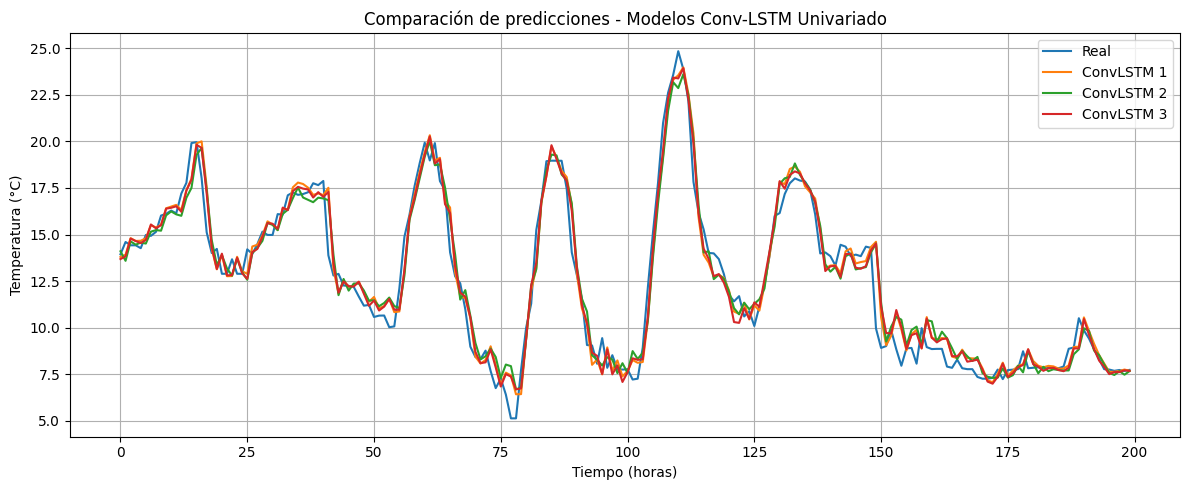

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv[:200], label='Real')
plt.plot(y_pred1_inv[:200], label='ConvLSTM 1')
plt.plot(y_pred2_inv[:200], label='ConvLSTM 2')
plt.plot(y_pred3_inv[:200], label='ConvLSTM 3')
plt.title("Comparación de predicciones - Modelos Conv-LSTM Univariado")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()